<a href="https://colab.research.google.com/github/Shahzad-kml/ML1/blob/main/Implementation_of_First_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Loan_Cleaned_data.csv')
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,0.0,0.0,1.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,0.5,1.0
1,1,LP001003,0.0,1.0,0.666667,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,2,LP001005,0.0,1.0,1.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,0.5,1.0
3,3,LP001006,0.0,1.0,1.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,0.5,1.0
4,4,LP001008,0.0,0.0,1.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,0.5,1.0


In [ ]:
data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# Seprating the dependents and indenpendets variables
x=data.drop(['Loan_ID','Loan_Status'],axis=1)
y=data.Loan_Status

In [ ]:
# Creating the Trianing and Test set
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y=tts(x,y, stratify=y, random_state=101, test_size=0.2)

In [ ]:
import keras
print(keras.__version__)

2.8.0


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
from keras import Sequential
from keras.layers import InputLayer, Dense

In [ ]:
# Total no. of neurons for input and output
input_neurons=train_x.shape[1]
output_neurons=1

In [ ]:
# Defining the Hidden Layers
number_of_hidden_layers=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5

In [ ]:
# Defining the Architecture of the Model
model=Sequential()

In [ ]:
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Total number of parameters including bias values 
layer_1=input_neurons*neuron_hidden_layer_1+10
layer_2=neuron_hidden_layer_1*neuron_hidden_layer_2+5
layer_3=neuron_hidden_layer_2*output_neurons+1
print(layer_1, layer_2, layer_3)

120 55 6


In [ ]:
# compling the model
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics='accuracy')

In [ ]:
# Trianing the model
model_train=model.fit(train_x, train_y,epochs=50, validation_data=(test_x, test_y))

Epoch 1/50
16/16 [==============================] - 3s 15ms/step - loss: 0.7624 - accuracy: 0.3320 - val_loss: 0.7170 - val_accuracy: 0.3821
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.4969 - val_loss: 0.6789 - val_accuracy: 0.6098
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6151 - val_loss: 0.6551 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6536 - accuracy: 0.6640 - val_loss: 0.6362 - val_accuracy: 0.6829
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6782 - val_loss: 0.6217 - val_accuracy: 0.7073
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6243 - accuracy: 0.6843 - val_loss: 0.6099 - val_accuracy: 0.6992
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6139 - accuracy: 0.6884 - val_loss: 0.6002 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

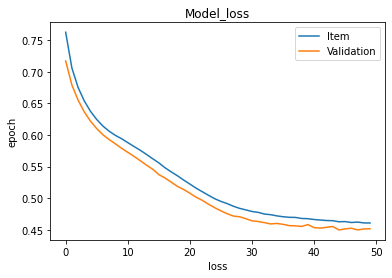

In [ ]:
# Visualizing the Model Performance 
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('Model_loss')
plt.legend(['Item','Validation'],loc='upper right')
plt.show()

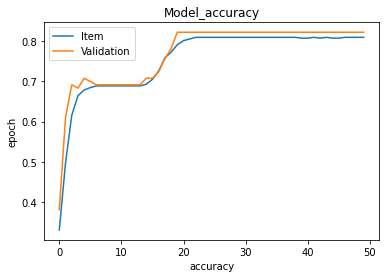

In [ ]:
# Visualizing the accuracy
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title('Model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Item','Validation'],loc='bottom right')
plt.show()